## Analyzing Police Activity with pandas

### In this project, we will explore the Stanford Open Policing Project dataset and analyze the impact of gender on police behavior. They've collected data from 31 US states, but in this project we'll be focusing on data from the state of Rhode Island. 

#### Download the data:
wget https://stacks.stanford.edu/file/druid:py883nd2578/RI-clean.csv.gz

gunzip RI-clean.csv.gz

In [1]:
import pandas as pd

###########################################
# Part 1. Preparing the data for analysis #
###########################################

#----------------------------
# (1.1) Examining the dataset
#----------------------------

# Read data set into a DataFrame named ri
ri = pd.read_csv('../data/RI-clean.csv')

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

/home/cchen/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


              id state   stop_date stop_time location_raw  county_name  \
0  RI-2005-00001    RI  2005-01-02     01:55      Zone K1          NaN   
1  RI-2005-00002    RI  2005-01-02     20:30      Zone X4          NaN   
2  RI-2005-00003    RI  2005-01-04     11:30      Zone X1          NaN   
3  RI-2005-00004    RI  2005-01-04     12:55      Zone X4          NaN   
4  RI-2005-00005    RI  2005-01-06     01:30      Zone X4          NaN   

   county_fips  fine_grained_location police_department driver_gender  \
0          NaN                    NaN               600             M   
1          NaN                    NaN               500             M   
2          NaN                    NaN                 0           NaN   
3          NaN                    NaN               500             M   
4          NaN                    NaN               500             M   

     ...     search_conducted  search_type_raw search_type contraband_found  \
0    ...                False        

In [2]:
#-----------------------
# (1.2) Dropping columns 
#-----------------------

# Examine the shape of the DataFrame
print(ri.shape)

# Drop empty and unuseful columns
ri.drop(['state', 'county_name', 'county_fips', 'fine_grained_location'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(509671, 26)
(509671, 22)


In [3]:
#--------------------
# (1.3) Dropping rows
#--------------------

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

id                         0
stop_date                  0
stop_time                  0
location_raw               0
police_department          0
driver_gender              0
driver_age_raw             1
driver_age              1638
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw       462822
search_type           462822
contraband_found           0
stop_outcome               0
is_arrested                0
stop_duration              0
out_of_state             808
drugs_related_stop         0
district                   0
dtype: int64
(480584, 22)


In [4]:
#-----------------------------
# (1.4) Using proper datatypes 
#-----------------------------

# Finding an incorrect data type
print(ri.dtypes)

# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtype)

id                     object
stop_date              object
stop_time              object
location_raw           object
police_department      object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race_raw        object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type_raw        object
search_type            object
contraband_found         bool
stop_outcome           object
is_arrested            object
stop_duration          object
out_of_state           object
drugs_related_stop       bool
district               object
dtype: object
object
bool


In [5]:
#-------------------------------
# (1.5) Creating a DatetimeIndex
#-------------------------------

# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

id                            object
stop_date                     object
stop_time                     object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object
DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
             

In [6]:
##################################################################
# Part 2. Exploring the relationship between gender and policing #
##################################################################

#---------------------------------
# (2.1) Comparing violations by gender
#---------------------------------

# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

"""More than half of all violations are for speeding, followed by other moving violations and equipment violations."""

# Create a DataFrame of female drivers
female = ri[ri.driver_gender=='F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender=='M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

"""About two-thirds of female traffic stops are for speeding, 
whereas stops of males are more balanced among the six categories. 
This doesn't mean that females speed more often than males, 
however, since we didn't take into account the number of stops or drivers."""

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64
Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64
Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64
Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64


"About two-thirds of female traffic stops are for speeding, \nwhereas stops of males are more balanced among the six categories. \nThis doesn't mean that females speed more often than males, \nhowever, since we didn't take into account the number of stops or drivers."

In [7]:
#--------------------------------------------
# (2.2) Comparing speeding outcomes by gender
#--------------------------------------------

# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=='F') & (ri.violation=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=='M') & (ri.violation=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

"""The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. 
Thus, the data fails to show that gender has an impact on who gets a ticket for speeding."""

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64


'The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. \nThus, the data fails to show that gender has an impact on who gets a ticket for speeding.'

In [8]:
#---------------------------------------
# (2.3) Comparing search rates by gender
#---------------------------------------

# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)  # bool

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

"""It looks like the search rate is about 3.8%. Next, you'll examine 
whether the search rate varies by driver gender."""

# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean())

# Calculate the search rate for male drivers
print(ri[ri.driver_gender=='M'].search_conducted.mean())

# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

"""Male drivers are searched more than twice as often as female drivers. Why might this be?"""

# Adding a second factor to the analysis
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

"""For all types of violations, the search rate is higher for males than for females, 
disproving our hypothesis. The search rate varies by violation type, 
and the difference in search rate between males and females is 
because they tend to commit different violations."""

bool
False    0.963041
True     0.036959
Name: search_conducted, dtype: float64
0.036959199640437465
0.018751239152648355
0.04379217389811301
driver_gender
F    0.018751
M    0.043792
Name: search_conducted, dtype: float64
driver_gender  violation          
F              Equipment              0.040245
               Moving violation       0.038021
               Other                  0.045898
               Registration/plates    0.054700
               Seat belt              0.017746
               Speeding               0.007738
M              Equipment              0.070916
               Moving violation       0.059156
               Other                  0.046120
               Registration/plates    0.103589
               Seat belt              0.031705
               Speeding               0.026630
Name: search_conducted, dtype: float64
violation            driver_gender
Equipment            F                0.040245
                     M                0.070916
Moving vio

'For all types of violations, the search rate is higher for males than for females, \ndisproving our hypothesis. The search rate varies by violation type, \nand the difference in search rate between males and females is \nbecause they tend to commit different violations.'

In [9]:
#--------------------------------------
# (2.4) Comparing frisk rates by gender
#--------------------------------------

# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)  # bool

# Take the sum of 'frisk'
print(ri.frisk.sum())

"""It looks like there were 303 drivers who were frisked. Next, you'll examine 
whether gender affects who is frisked."""

# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted==True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

"""The frisk rate is higher for males than for females, though we can't conclude that 
this difference is caused by the driver's gender."""

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

"The frisk rate is higher for males than for females, though we can't conclude that \nthis difference is caused by the driver's gender."

In [10]:
##########################################
# Part 3. Visual exploratory data analysis 
##########################################

#-----------------------------------------
# (3.1) Calculating the hourly arrest rate
#-----------------------------------------

# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

"""The arrest rate has a significant spike overnight, and then dips in the early morning hours."""

0.03454755048024903
stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64


<Figure size 640x480 with 1 Axes>

'The arrest rate has a significant spike overnight, and then dips in the early morning hours.'

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


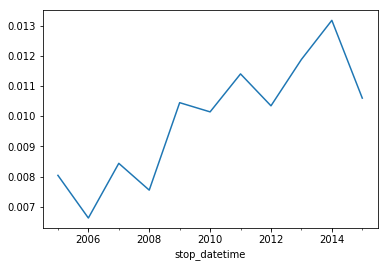

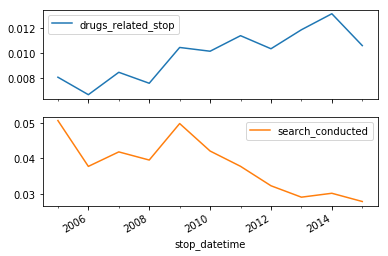

'The rate of drug-related stops increased even though the search rate decreased, \ndisproving our hypothesis.'

In [11]:
#----------------------------------
# (3.2) Plotting drug-related stops
#----------------------------------

# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()
plt.show()

"""The rate of drug-related stops nearly doubled over the course of 10 years. 
Why might that be the case?"""

# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

"""The rate of drug-related stops increased even though the search rate decreased, 
disproving our hypothesis."""

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1         3786              7127   1501                  628          1   
Zone K2        11285             16440   5103                 4056       2897   
Zone K3        12959             16218   3926                 3871       3660   
Zone X1         1725              3711    752                  192        451   
Zone X3        11520             17178   4069                 3532       4445   
Zone X4        19975             29554   8865                 7551       4870   

violation  Speeding  
district             
Zone K1       33067  
Zone K2       57500  
Zone K3       68234  
Zone X1        6393  
Zone X3       48687  
Zone X4       54855  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

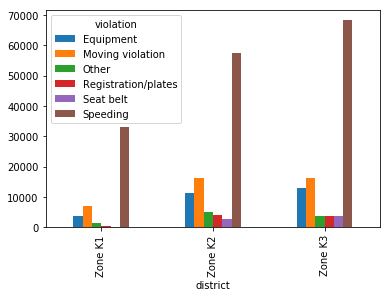

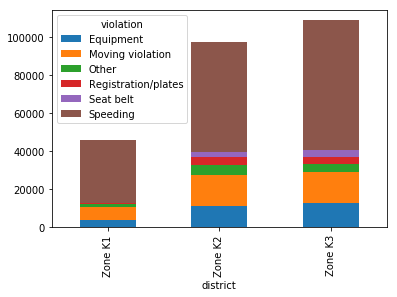

'The vast majority of traffic stops in Zone K1 are for speeding, \nand Zones K2 and K3 are remarkably similar to one another in terms of violations.'

In [12]:
#---------------------------------------------------
# (3.3) What violations are caught in each district?
#---------------------------------------------------

# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')
plt.show()

# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)
plt.show()

"""The vast majority of traffic stops in Zone K1 are for speeding, 
and Zones K2 and K3 are remarkably similar to one another in terms of violations."""

['0-15 Min' '16-30 Min' '30+ Min' '2' '1']
[ 8. 23. 45. nan]
violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64


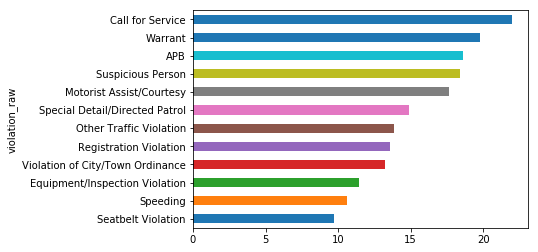

In [13]:
#----------------------------------------------------
# (3.4) How long will you be stopped for a violation?
#----------------------------------------------------

# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())  # ['0-15 Min' '16-30 Min' '30+ Min']

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')
plt.show()

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


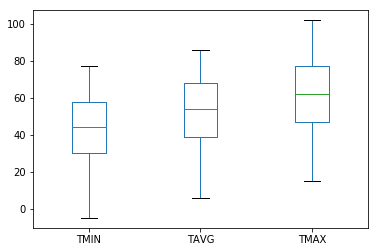

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


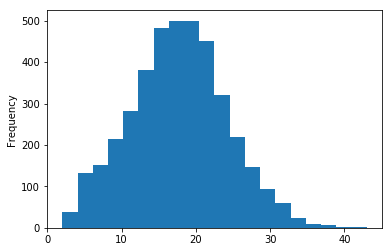

'The TDIFF column has no negative values and its distribution is approximately normal, \nboth of which are signs that the data is trustworthy.'

In [14]:
#####################################################
# Part 4. Analyzing the effect of weather on policing 
#####################################################

#------------------------------------
# (4.1) Exploring the weather dataset
#------------------------------------

# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('../data/weather.csv')

# Describe the temperature columns
print(weather[['TMIN','TAVG','TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN','TAVG','TMAX']].plot(kind='box')
plt.show()

# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)
plt.show()

"""The TDIFF column has no negative values and its distribution is approximately normal, 
both of which are signs that the data is trustworthy."""

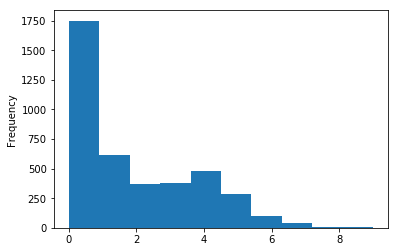

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64
0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


/home/cchen/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


In [15]:
#-------------------------------
# (4.2) Categorizing the weather
#-------------------------------

# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']
#WT = WT.apply(pd.to_numeric)  # convert object to float 

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')
plt.show()

"""It looks like many days didn't have any bad weather conditions, 
and only a small portion of days had more than four bad weather conditions."""

# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category', ordered=True, categories=cats)

# Examine the head of 'rating'
print(weather.rating.head())

In [16]:
#-----------------------
# (4.3) Merging datasets
#-----------------------

# Reset the index of 'ri': move the stop_datetime index to a column since the index will be lost during the merge
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

        stop_datetime             id   stop_date stop_time location_raw  \
0 2005-01-02 01:55:00  RI-2005-00001  2005-01-02     01:55      Zone K1   
1 2005-01-02 20:30:00  RI-2005-00002  2005-01-02     20:30      Zone X4   
2 2005-01-04 12:55:00  RI-2005-00004  2005-01-04     12:55      Zone X4   
3 2005-01-06 01:30:00  RI-2005-00005  2005-01-06     01:30      Zone X4   
4 2005-01-12 08:05:00  RI-2005-00006  2005-01-12     08:05      Zone X1   

  police_department driver_gender  driver_age_raw  driver_age driver_race_raw  \
0               600             M          1985.0        20.0               W   
1               500             M          1987.0        18.0               W   
2               500             M          1986.0        19.0               W   
3               500             M          1978.0        27.0               B   
4                 0             M          1973.0        32.0               B   

      ...      search_type contraband_found stop_outcome  is_a

In [17]:
#-------------------------------------------
# (4.4) Dose weather affect the arrest rate?
#-------------------------------------------
"""
Do police officers arrest drivers more often when the weather is bad? Find out below!

First, you'll calculate the overall arrest rate.
Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
Finally, you'll add violation type as a second factor in the analysis, 
to see if that accounts for any differences in the arrest rate.
"""
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())
"""The arrest rate increases as the weather gets worse, and 
that trend persists across many of the violation types."""

"""
The output of a single .groupby() operation on multiple columns is a Series with a MultiIndex.
Working with this type of object is similar to working with a DataFrame:

The outer index level is like the DataFrame rows.
The inner index level is like the DataFrame columns.
"""
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])


"""
Reshape the arrest_rate Series into a DataFrame. 
This is a useful step when working with any multi-indexed Series, 
since it enables you to access the full range of DataFrame methods.

Then, create the exact same DataFrame using a pivot table. 
This is a great example of how pandas often gives you more than one way to reach the same result!
"""
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

0.03454755048024903
rating
good     0.033004
bad      0.035199
worse    0.039360
Name: is_arrested, dtype: float64
violation            rating
Equipment            good      0.056484
                     bad       0.059704
                     worse     0.094373
Moving violation     good      0.055621
                     bad       0.057976
                     worse     0.062249
Other                good      0.082492
                     bad       0.084991
                     worse     0.058704
Registration/plates  good      0.076831
                     bad       0.092749
                     worse     0.098673
Seat belt            good      0.025503
                     bad       0.028845
                     worse     0.000000
Speeding             good      0.013214
                     bad       0.013368
                     worse     0.016600
Name: is_arrested, dtype: float64
violation            rating
Equipment            good      0.056484
                     bad       0.05